In [8]:
# Import required libraries
import streamlit as st
import pandas as pd
import numpy as np
import pickle  # if you want to load models from saved files
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Load Data
data_path = 'Crop_recommendation.csv'
crop_data = pd.read_csv(data_path)

# Load pre-trained models or define them directly here if not saved previously
# Example:
# dt_classifier = DecisionTreeClassifier(...parameters...)
# dt_classifier.fit(...training data...)

# User input function for crop features
def user_input_features():
    N = st.number_input("Nitrogen (N)", min_value=0, max_value=200, value=100)
    P = st.number_input("Phosphorus (P)", min_value=0, max_value=200, value=50)
    K = st.number_input("Potassium (K)", min_value=0, max_value=200, value=50)
    temperature = st.slider("Temperature (°C)", 0, 50, 25)
    humidity = st.slider("Humidity (%)", 0, 100, 50)
    ph = st.slider("Soil pH", 0.0, 14.0, 7.0)
    rainfall = st.slider("Rainfall (mm)", 0, 300, 100)
    features = pd.DataFrame({
        'N': [N], 'P': [P], 'K': [K], 'temperature': [temperature],
        'humidity': [humidity], 'ph': [ph], 'rainfall': [rainfall]
    })
    return features

# Display title and instructions
st.title("Crop Recommendation System")
st.write("Enter the following agricultural parameters to get crop recommendations.")

# Get user input
input_df = user_input_features()

# Predict with each model
if st.button("Get Recommendations"):
    # Assuming models have been defined or loaded, we predict with each
    dt_prediction = dt_classifier.predict(input_df)[0]
    rf_prediction = rf_classifier.predict(input_df)[0]
    lr_prediction = log_reg.predict(input_df)[0]
    nb_prediction = nb_classifier.predict(input_df)[0]
    svm_prediction = svm_classifier.predict(input_df)[0]
    xgb_prediction = label_encoder.inverse_transform(xgb_classifier.predict(input_df))[0]

    # Display results with accuracies
    st.subheader("Model Recommendations:")
    st.write(f"Decision Tree: {dt_prediction} (Accuracy: {accuracy_dt * 100:.2f}%)")
    st.write(f"Random Forest: {rf_prediction} (Accuracy: {accuracy_rf * 100:.2f}%)")
    st.write(f"Logistic Regression: {lr_prediction} (Accuracy: {accuracy_lr * 100:.2f}%)")
    st.write(f"Naive Bayes: {nb_prediction} (Accuracy: {accuracy_nb * 100:.2f}%)")
    st.write(f"SVM: {svm_prediction} (Accuracy: {accuracy_svm * 100:.2f}%)")
    st.write(f"XGBoost: {xgb_prediction} (Accuracy: {accuracy_xgb * 100:.2f}%)")

# Optional: Display data preview and correlation
if st.checkbox("Show Data and Correlation Matrix"):
    st.write(crop_data.head())
    st.write("Correlation Matrix:")
    st.write(sns.heatmap(crop_data.corr(), annot=True, cmap="YlGnBu"))
    st.pyplot()


2024-11-11 20:41:08.912 
  command:

    streamlit run C:\Users\arinr\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.metrics import classification_report
import warnings

# Suppress warnings for clearer output
warnings.filterwarnings('ignore')

# Load Data
data_path = 'Crop_recommendation.csv'
crop_data = pd.read_csv(data_path)

# Display top and bottom entries
crop_data.head(), crop_data.tail(), crop_data.size


(    N   P   K  temperature   humidity        ph    rainfall label
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice,
         N   P   K  temperature   humidity        ph    rainfall   label
 2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
 2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
 2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
 2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
 2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee,
 17600)

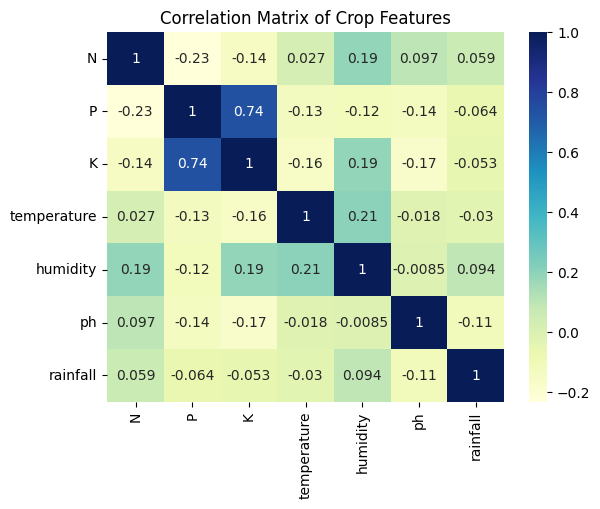

Decision Tree Accuracy: 90.00%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00       

In [3]:
# Inspect dataset dimensions and basic info
crop_data.shape, crop_data.columns, crop_data.dtypes

# View unique crop types and their frequency
crop_data['label'].nunique(), crop_data['label'].value_counts()

# Exclude non-numeric columns before calculating correlations
numeric_data = crop_data.select_dtypes(include=[np.number])

# Generate the heatmap with only numeric features
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Crop Features")
plt.show()

# Define feature and target variables
features = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
labels = crop_data['label']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2)

# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Evaluate Decision Tree performance
accuracy_dt = metrics.accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, dt_predictions))


In [4]:
# Import necessary classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize lists to keep track of model names and accuracy scores
model_names, accuracy_scores = [], []

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=2, n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest performance
accuracy_rf = metrics.accuracy_score(y_test, rf_predictions)
model_names.append('Random Forest')
accuracy_scores.append(accuracy_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, rf_predictions))

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# Evaluate Logistic Regression performance
accuracy_lr = metrics.accuracy_score(y_test, log_reg_predictions)
model_names.append('Logistic Regression')
accuracy_scores.append(accuracy_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(classification_report(y_test, log_reg_predictions))

# Optional: Print overall model accuracies for comparison
model_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy': [acc * 100 for acc in accuracy_scores]})
print("\nModel Performance Comparison:\n", model_accuracy)


Random Forest Accuracy: 99.55%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00       

In [6]:
# Importing the necessary classifiers
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# Evaluate Naive Bayes performance
accuracy_nb = metrics.accuracy_score(y_test, nb_predictions)
model_names.append('Naive Bayes')
accuracy_scores.append(accuracy_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, nb_predictions))

# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=2)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate SVM performance
accuracy_svm = metrics.accuracy_score(y_test, svm_predictions)
model_names.append('SVM')
accuracy_scores.append(accuracy_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, svm_predictions))

# Model Comparison Summary
model_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy (%)': [acc * 100 for acc in accuracy_scores]})
print("\nModel Performance Comparison:\n", model_accuracy)


Naive Bayes Accuracy: 99.09%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost with encoded labels
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2)
xgb_classifier.fit(X_train, y_train_encoded)

# Predict on the test set
xgb_predictions_encoded = xgb_classifier.predict(X_test)

# Decode both y_test and predictions back to original labels
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)  # Decode y_test
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions_encoded)  # Decode predictions

# Evaluate XGBoost performance
accuracy_xgb = accuracy_score(y_test_decoded, xgb_predictions_decoded)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test_decoded, xgb_predictions_decoded))


XGBoost Accuracy: 99.09%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

In [15]:
import pickle

# Save each model after training
with open("dt_classifier.pkl", "wb") as file:
    pickle.dump(dt_classifier, file)

with open("rf_classifier.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)

with open("log_reg.pkl", "wb") as file:
    pickle.dump(log_reg, file)

with open("nb_classifier.pkl", "wb") as file:
    pickle.dump(nb_classifier, file)

with open("svm_classifier.pkl", "wb") as file:
    pickle.dump(svm_classifier, file)

with open("xgb_classifier.pkl", "wb") as file:
    pickle.dump(xgb_classifier, file)
